# CS417 Project
### Asja Basovic
### 230401036

##  An Exploratory Study of Classification Strategies for Imbalanced Phishing Email Dataset Using Naive Bayes and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
link=r"C:\Users\Asja\Downloads\archive (9)\email_phishing_data.csv"
df=pd.read_csv(link)

## EDA section

In [3]:
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [4]:
df.isnull().sum() #no null values

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64

In [5]:
df.info() # all numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [6]:
df.describe() # checking basic statistics

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


In [7]:
len(df[df['label']==1 ]) # checking how many phishing emails are there

6949

In [8]:
len(df[df['label']==0 ]) # checking how many non-phishing emails are there

517897

In [9]:
len(df[df['label']==1 ])/len(df) # checking the percentage of phishing emails

0.013240074231298323

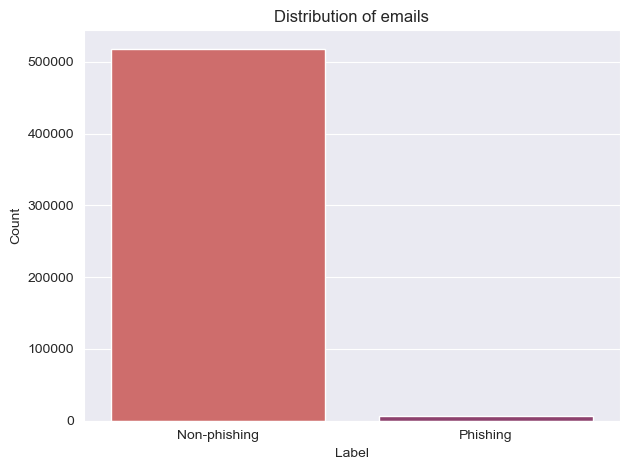

In [10]:
df['labelWords']=df['label'].map({1:'Phishing', 0:'Non-phishing'})
sns.set_style("darkgrid")
sns.countplot(data=df, x='labelWords', palette="flare")
plt.title('Distribution of emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

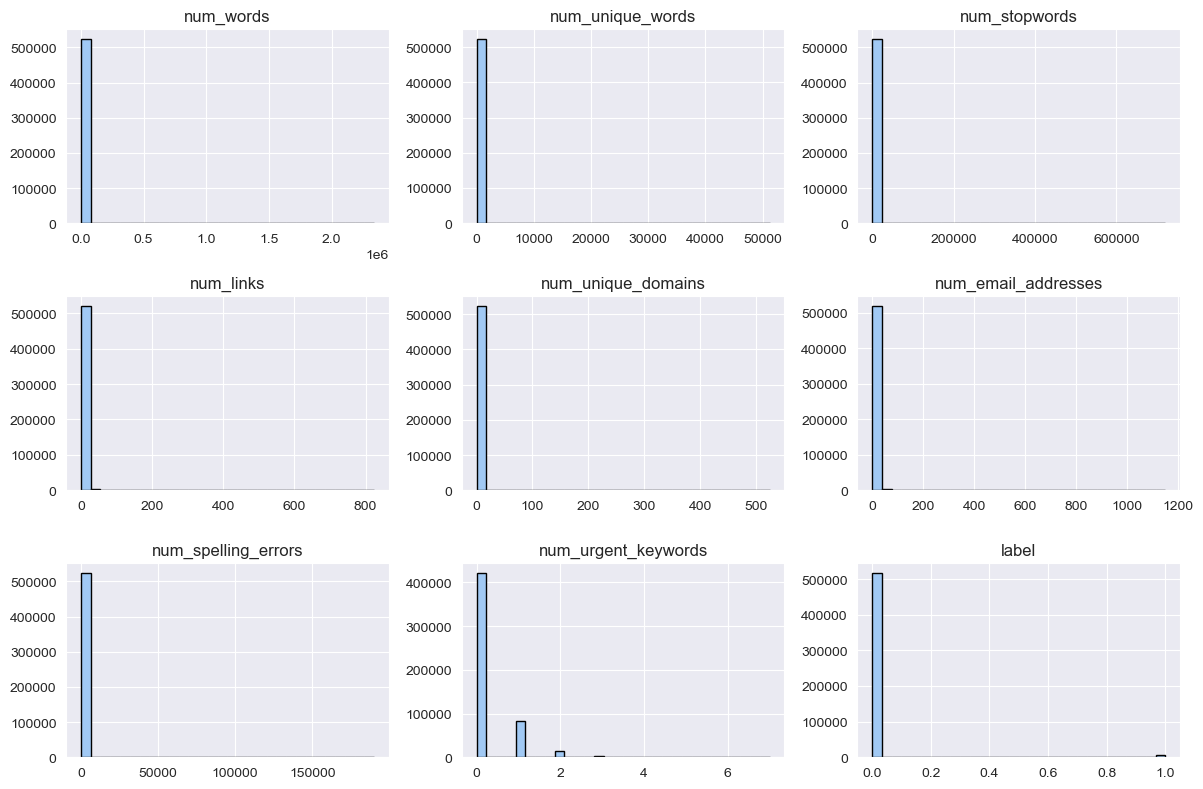

In [11]:
# checking the distribution of the whole dataset
#very skewed and imbalanced
df.hist(figsize=(12, 8), bins=30, color='#a1c9f4', edgecolor='black')   
plt.tight_layout()
plt.show()


<Axes: >

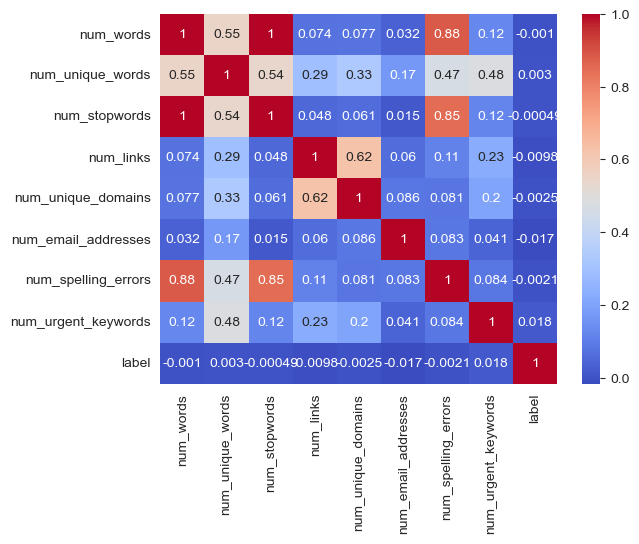

In [12]:
df=df.drop('labelWords', axis=1)
# chekcing the correlations
# very mixed
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


##  Preprocessing section


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

In [14]:
# split dependant and independant variables
X = df.drop("label", axis=1)
y = df["label"]

# stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# normalizing features for Logistic Regression using robust scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# normalizing features for Logistic Regression using standard scaler
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

## Baseline models section - Naive Bayes and Logistic Regression

In [15]:
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [16]:
# Naive Bayes (does not need feature scaling)
nb_model = ComplementNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Logistic Regression using robust scaler
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Logistic Regression using standard scaler
lr_model2 = LogisticRegression(max_iter=1000, random_state=42)
lr_model2.fit(X_train_scaled2, y_train)
y_pred_lr2 = lr_model2.predict(X_test_scaled2)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

Not Phishing       1.00      0.30      0.46    155369
    Phishing       0.02      0.90      0.03      2085

    accuracy                           0.31    157454
   macro avg       0.51      0.60      0.25    157454
weighted avg       0.98      0.31      0.45    157454



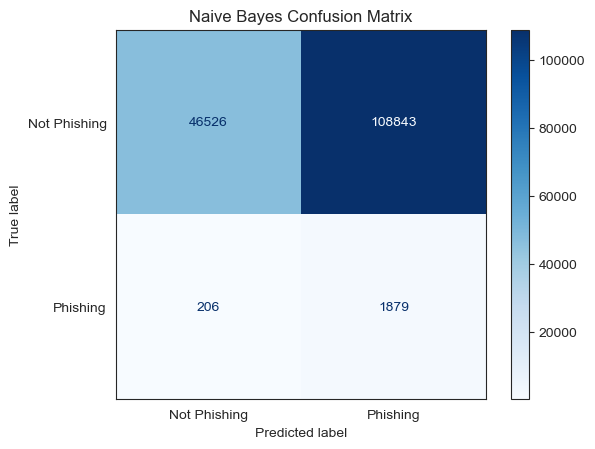

Logistic Regression Classification Report (Robust Scaler):
              precision    recall  f1-score   support

Not Phishing       0.99      1.00      0.99    155369
    Phishing       1.00      0.00      0.00      2085

    accuracy                           0.99    157454
   macro avg       0.99      0.50      0.50    157454
weighted avg       0.99      0.99      0.98    157454



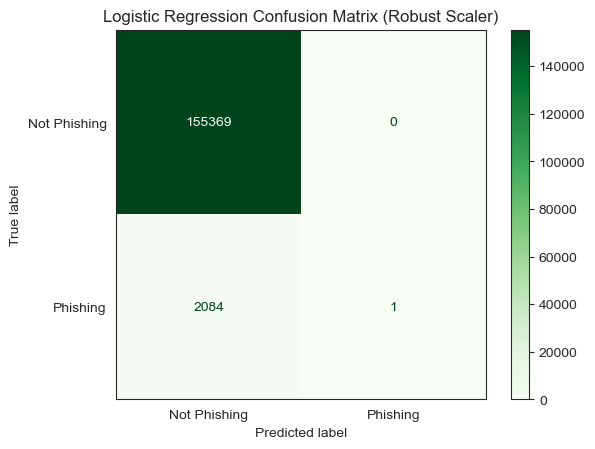

Logistic Regression Classification Report (Standard Scaler):
              precision    recall  f1-score   support

Not Phishing       0.99      1.00      0.99    155369
    Phishing       0.00      0.00      0.00      2085

    accuracy                           0.99    157454
   macro avg       0.49      0.50      0.50    157454
weighted avg       0.97      0.99      0.98    157454



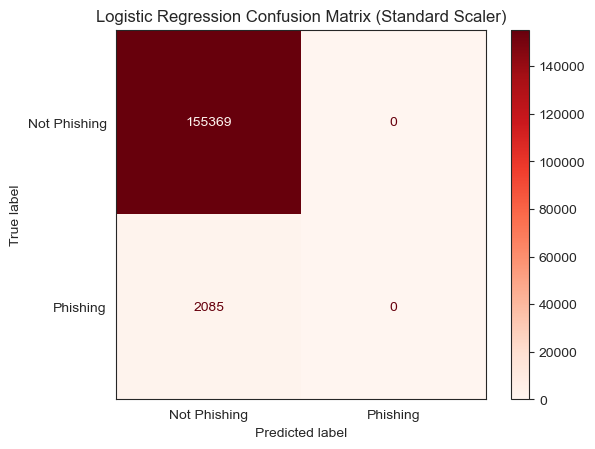

In [17]:
# evaluation for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=["Not Phishing", "Phishing"]))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.set_style("white")
ConfusionMatrixDisplay(cm_nb, display_labels=["Not Phishing", "Phishing"]).plot(cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# evaluation for Logistic Regression (Robust scaler)
print("Logistic Regression Classification Report (Robust Scaler):")
print(classification_report(y_test, y_pred_lr, target_names=["Not Phishing", "Phishing"]))
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=["Not Phishing", "Phishing"]).plot(cmap='Greens')
plt.title("Logistic Regression Confusion Matrix (Robust Scaler)")
plt.show()

# evaluation for Logistic Regression (Standard scaler)
print("Logistic Regression Classification Report (Standard Scaler):")
print(classification_report(y_test, y_pred_lr2, target_names=["Not Phishing", "Phishing"]))
cm_lr = confusion_matrix(y_test, y_pred_lr2)
ConfusionMatrixDisplay(cm_lr, display_labels=["Not Phishing", "Phishing"]).plot(cmap='Reds')
plt.title("Logistic Regression Confusion Matrix (Standard Scaler)")
plt.show()


## Handling imbalance section 

### Logistic Regression

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [19]:
# SMOTE sampling_strategy=0.3
smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_smote3, y_train_smote3 = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote3.value_counts())


Before SMOTE: label
0    362528
1      4864
Name: count, dtype: int64
After SMOTE: label
0    362528
1    108758
Name: count, dtype: int64


### SMOTE and class balancing for Logistic Regression

#### Logistic Regression on SMOTE data, sampling_strategy=0.3

Logistic Regression with SMOTE (sampling_strategy=0.3)
              precision    recall  f1-score   support

Not Phishing       0.99      0.99      0.99    155369
    Phishing       0.07      0.05      0.06      2085

    accuracy                           0.98    157454
   macro avg       0.53      0.52      0.52    157454
weighted avg       0.98      0.98      0.98    157454



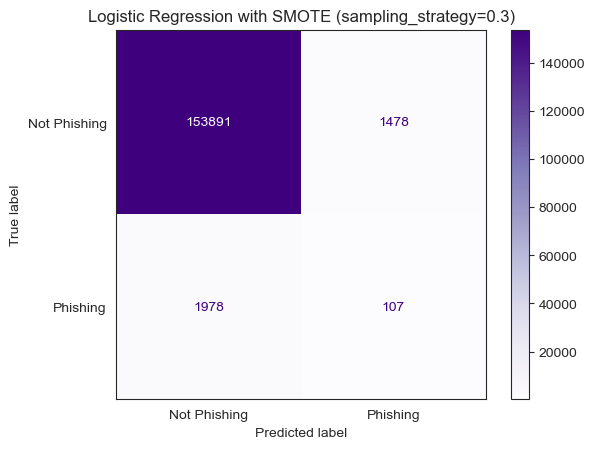

In [20]:
lr_smote3 = LogisticRegression(max_iter=1000, random_state=42)
lr_smote3.fit(X_train_smote3, y_train_smote3)
y_pred_lr_smote3 = lr_smote3.predict(X_test_scaled)

print("Logistic Regression with SMOTE (sampling_strategy=0.3)")
print(classification_report(y_test, y_pred_lr_smote3, target_names=["Not Phishing", "Phishing"]))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr_smote3), display_labels=["Not Phishing", "Phishing"]).plot(cmap='Purples')
plt.title("Logistic Regression with SMOTE (sampling_strategy=0.3)")
plt.show()

#### Logistic Regression with class weighting

Logistic Regression (class_weight='balanced'):
              precision    recall  f1-score   support

Not Phishing       0.99      0.53      0.69    155369
    Phishing       0.02      0.77      0.04      2085

    accuracy                           0.54    157454
   macro avg       0.51      0.65      0.37    157454
weighted avg       0.98      0.54      0.69    157454



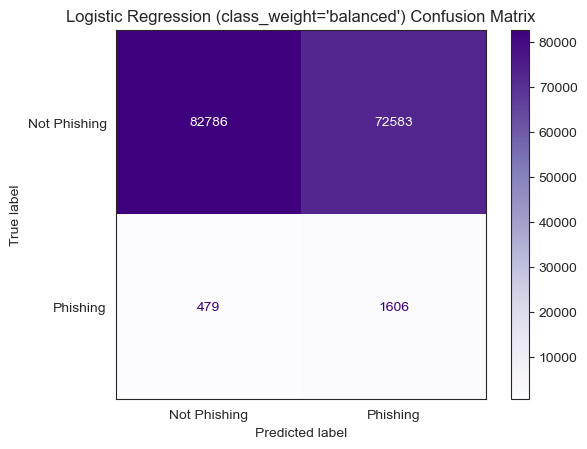

In [21]:
lr_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_weighted.fit(X_train_scaled, y_train)
y_pred_lr_weighted = lr_weighted.predict(X_test_scaled)

print("Logistic Regression (class_weight='balanced'):")
print(classification_report(y_test, y_pred_lr_weighted, target_names=["Not Phishing", "Phishing"]))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr_weighted),
                       display_labels=["Not Phishing", "Phishing"]).plot(cmap='Purples')
plt.title("Logistic Regression (class_weight='balanced') Confusion Matrix")
plt.show()

#### Logistic Regression on SMOTE data and balanced classes, sampling_strategy=0.3

Logistic Regression (SMOTE sampling_strategy=0.3, class_weight='balanced')
              precision    recall  f1-score   support

Not Phishing       0.99      0.54      0.70    155369
    Phishing       0.02      0.76      0.04      2085

    accuracy                           0.54    157454
   macro avg       0.51      0.65      0.37    157454
weighted avg       0.98      0.54      0.69    157454



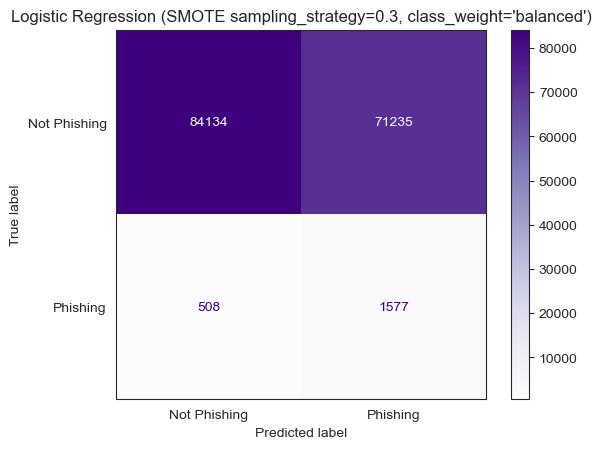

In [22]:
lr_smote3 = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)
lr_smote3.fit(X_train_smote3, y_train_smote3)
y_pred_lr_smote3 = lr_smote3.predict(X_test_scaled)

print("Logistic Regression (SMOTE sampling_strategy=0.3, class_weight='balanced')")
print(classification_report(y_test, y_pred_lr_smote3, target_names=["Not Phishing", "Phishing"]))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr_smote3),
                       display_labels=["Not Phishing", "Phishing"]).plot(cmap='Purples')
plt.title("Logistic Regression (SMOTE sampling_strategy=0.3, class_weight='balanced')")
plt.show()


#### Logistic Regression on SMOTE data, sampling_strategy default

In [23]:
# SMOTE default
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: label
0    362528
1      4864
Name: count, dtype: int64
After SMOTE: label
0    362528
1    362528
Name: count, dtype: int64


Logistic Regression with SMOTE (sampling_strategy=1.0)
              precision    recall  f1-score   support

Not Phishing       0.99      0.54      0.70    155369
    Phishing       0.02      0.76      0.04      2085

    accuracy                           0.54    157454
   macro avg       0.51      0.65      0.37    157454
weighted avg       0.98      0.54      0.69    157454



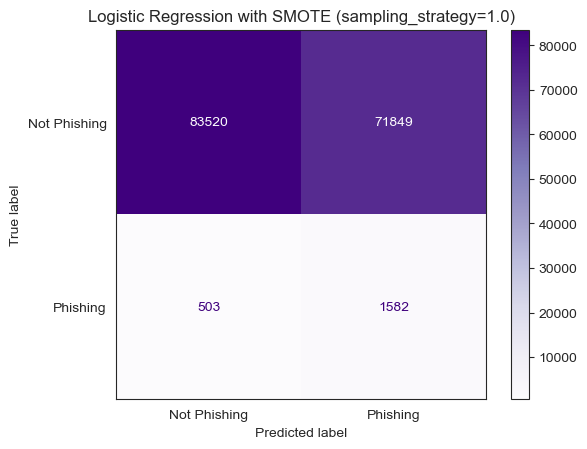

In [24]:
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test_scaled)

print("Logistic Regression with SMOTE (sampling_strategy=1.0)")
print(classification_report(y_test, y_pred_lr_smote, target_names=["Not Phishing", "Phishing"]))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr_smote),
                       display_labels=["Not Phishing", "Phishing"]).plot(cmap='Purples')
plt.title("Logistic Regression with SMOTE (sampling_strategy=1.0)")
plt.show()

#### Logistic Regression on SMOTE data and balanced classes, sampling_strategy=1.0

Logistic Regression(sampling_strategy=1.0, class_weight='balanced')
              precision    recall  f1-score   support

Not Phishing       0.99      0.54      0.70    155369
    Phishing       0.02      0.76      0.04      2085

    accuracy                           0.54    157454
   macro avg       0.51      0.65      0.37    157454
weighted avg       0.98      0.54      0.69    157454



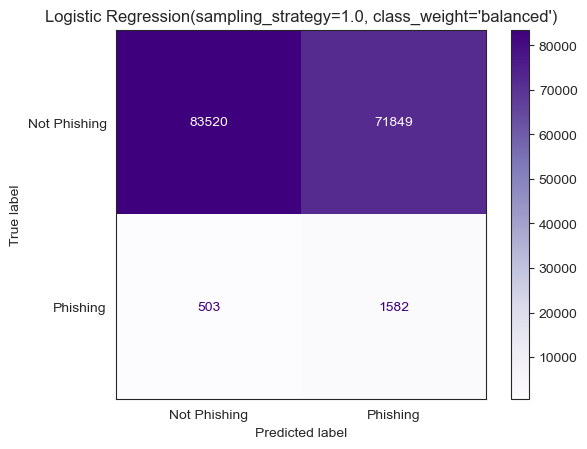

In [25]:
lr_smote = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test_scaled)

print("Logistic Regression(sampling_strategy=1.0, class_weight='balanced')")
print(classification_report(y_test, y_pred_lr_smote, target_names=["Not Phishing", "Phishing"]))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr_smote),
                       display_labels=["Not Phishing", "Phishing"]).plot(cmap='Purples')
plt.title("Logistic Regression(sampling_strategy=1.0, class_weight='balanced')")
plt.show()

### Naive Bayes

### Undersampling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [27]:
# baseline model 
print("BASELINE MODEL - Naive Bayes without Undersampling")

nb_baseline = ComplementNB()
nb_baseline.fit(X_train, y_train)
y_pred_baseline = nb_baseline.predict(X_test)
y_pred_proba_baseline = nb_baseline.predict_proba(X_test)[:, 1]

# evaluation 
print("\nBaseline Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_baseline, target_names=["Not Phishing", "Phishing"]))

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)

print("\nBaseline Metrics:")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"Recall: {baseline_recall:.4f}")
print(f"F1-Score: {baseline_f1:.4f}")

# undersampled model
print("\nUNDERSAMPLED MODEL - Naive Bayes with Random Undersampling")

# Random Undersampling to training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print(f"\nAfter undersampling training set class distribution:")
print(f"Class 0: {sum(y_train_resampled == 0)} samples")
print(f"Class 1: {sum(y_train_resampled == 1)} samples")

nb_undersampled = ComplementNB()
nb_undersampled.fit(X_train_resampled, y_train_resampled)
y_pred_undersampled = nb_undersampled.predict(X_test)
y_pred_proba_undersampled = nb_undersampled.predict_proba(X_test)[:, 1]

# evaluation 
print("\nUndersampled Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_undersampled, target_names=["Not Phishing", "Phishing"]))

undersampled_accuracy = accuracy_score(y_test, y_pred_undersampled)
undersampled_precision = precision_score(y_test, y_pred_undersampled)
undersampled_recall = recall_score(y_test, y_pred_undersampled)
undersampled_f1 = f1_score(y_test, y_pred_undersampled)

print(f"\nUndersampled Metrics:")
print(f"Accuracy: {undersampled_accuracy:.4f}")
print(f"Precision: {undersampled_precision:.4f}")
print(f"Recall: {undersampled_recall:.4f}")
print(f"F1-Score: {undersampled_f1:.4f}")

BASELINE MODEL - Naive Bayes without Undersampling

Baseline Naive Bayes Classification Report
              precision    recall  f1-score   support

Not Phishing       1.00      0.30      0.46    155369
    Phishing       0.02      0.90      0.03      2085

    accuracy                           0.31    157454
   macro avg       0.51      0.60      0.25    157454
weighted avg       0.98      0.31      0.45    157454


Baseline Metrics:
Accuracy: 0.3074
Precision: 0.0170
Recall: 0.9012
F1-Score: 0.0333

UNDERSAMPLED MODEL - Naive Bayes with Random Undersampling

After undersampling training set class distribution:
Class 0: 4864 samples
Class 1: 4864 samples

Undersampled Naive Bayes Classification Report
              precision    recall  f1-score   support

Not Phishing       1.00      0.32      0.48    155369
    Phishing       0.02      0.89      0.03      2085

    accuracy                           0.32    157454
   macro avg       0.51      0.60      0.26    157454
weighted avg  

Metrics Comparison:
             Model  Accuracy  Precision  Recall  F1-Score
0      Baseline NB    0.3074     0.0170  0.9012    0.0333
1  Undersampled NB    0.3242     0.0171  0.8863    0.0336

Performance Changes (Undersampled vs Baseline):
Accuracy: +0.0168
Precision: +0.0001
Recall: -0.0149
F1-Score: +0.0003


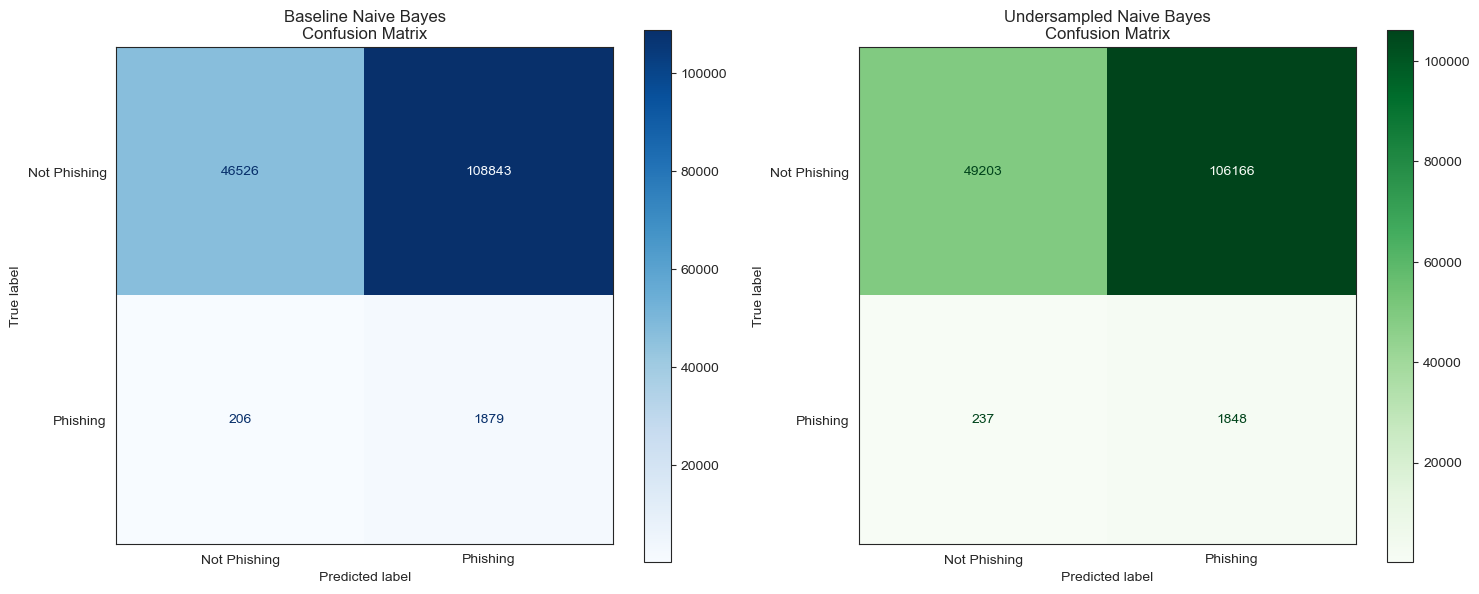

In [28]:
comparison_data = {
    'Model': ['Baseline NB', 'Undersampled NB'],
    'Accuracy': [baseline_accuracy, undersampled_accuracy],
    'Precision': [baseline_precision, undersampled_precision],
    'Recall': [baseline_recall, undersampled_recall],
    'F1-Score': [baseline_f1, undersampled_f1],
}

comparison_df = pd.DataFrame(comparison_data)
print("Metrics Comparison:")
print(comparison_df.round(4))
# improvements
print(f"\nPerformance Changes (Undersampled vs Baseline):")
print(f"Accuracy: {undersampled_accuracy - baseline_accuracy:+.4f}")
print(f"Precision: {undersampled_precision - baseline_precision:+.4f}")
print(f"Recall: {undersampled_recall - baseline_recall:+.4f}")
print(f"F1-Score: {undersampled_f1 - baseline_f1:+.4f}")

# plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_baseline),display_labels=["Not Phishing", "Phishing"]).plot(ax=ax1, cmap='Blues')
ax1.set_title('Baseline Naive Bayes\nConfusion Matrix')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_undersampled),display_labels=["Not Phishing", "Phishing"]).plot(ax=ax2, cmap='Greens')
ax2.set_title("Undersampled Naive Bayes\nConfusion Matrix")

plt.tight_layout()
plt.show()

## Feature engineering section

### Logistic Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.pipeline import Pipeline

In [30]:
# baseline Logistic Regression 
pipeline_base = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline_base.fit(X_train, y_train)
y_pred_base = pipeline_base.predict(X_test)
y_proba_base = pipeline_base.predict_proba(X_test)[:, 1]

# Logistic Regression with Polynomial Interaction Terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interact = poly.fit_transform(X_train)
X_test_interact = poly.transform(X_test)

pipeline_poly = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline_poly.fit(X_train_interact, y_train)
y_pred_poly = pipeline_poly.predict(X_test_interact)
y_proba_poly = pipeline_poly.predict_proba(X_test_interact)[:, 1]

# evaulation
results = {
    'Model': ['LogReg (no interactions)', 'LogReg (with interactions)'],
    'Precision': [precision_score(y_test, y_pred_base),precision_score(y_test, y_pred_poly)],
    'Recall': [recall_score(y_test, y_pred_base), recall_score(y_test, y_pred_poly)],
    'F1-score': [f1_score(y_test, y_pred_base),f1_score(y_test, y_pred_poly)],
}

print(pd.DataFrame(results))

# checking VarianceThreshold
vt = VarianceThreshold(threshold=0.01)
vt.fit(X_train)
low_var_indices = [i for i, var in enumerate(vt.variances_) if var <= 0.01]
print('\n')
print("Low variance feature indices:", low_var_indices)

                        Model  Precision    Recall  F1-score
0    LogReg (no interactions)   0.021647  0.770264  0.042111
1  LogReg (with interactions)   0.023785  0.654197  0.045901


Low variance feature indices: []


### Naive Bayes

In [31]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Naive Bayes requires non-negative values
scaler = MinMaxScaler()

# baseline
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cnb_base = ComplementNB()
cnb_base.fit(X_train, y_train)
y_pred_cnb_base = cnb_base.predict(X_test)
y_proba_cnb_base = cnb_base.predict_proba(X_test)[:, 1]

# with interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# scale again after polynomial expansion
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

cnb_poly = ComplementNB()
cnb_poly.fit(X_train_poly_scaled, y_train)
y_pred_cnb_poly = cnb_poly.predict(X_test_poly_scaled)
y_proba_cnb_poly = cnb_poly.predict_proba(X_test_poly_scaled)[:, 1]

# evaluation
results_cnb = {
    'Model': ['ComplementNB (no interactions)', 'ComplementNB (with interactions)'],
    'Precision': [precision_score(y_test, y_pred_cnb_base), precision_score(y_test, y_pred_cnb_poly)],
    'Recall': [recall_score(y_test, y_pred_cnb_base),recall_score(y_test, y_pred_cnb_poly)],
    'F1-score': [f1_score(y_test, y_pred_cnb_base),f1_score(y_test, y_pred_cnb_poly)],
}

print(pd.DataFrame(results_cnb))

                              Model  Precision    Recall  F1-score
0    ComplementNB (no interactions)    0.01697  0.901199  0.033314
1  ComplementNB (with interactions)    0.03322  0.042206  0.037178
